In [100]:
import pandas as pd
from google.colab import drive #memanggil package  
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
path = '/content/drive/MyDrive/CSV/ikat - Sheet1.csv'
df = pd.read_csv(path)
df.describe()

,volume,omzet_(rp)
count,17.000000,1.700000e+01
mean,548.000000,6.733824e+06
std,720.996793,8.468882e+06
min,1.000000,1.000000e+04
25%,24.000000,4.800000e+05
50%,134.000000,2.090000e+06
75%,1126.000000,1.210000e+07
max,2628.000000,2.628000e+07


In [102]:
df

,lokasi_omzet_penjualan,jenis_komoditi,volume,satuan,omzet_(rp)
0,TC Klender,Songop,1,Ikat,10000
1,TC Klender,Sri Gading,6,Ikat,85000
2,Pasar Bunga Rawabelong,Bunga Balon,11,Ikat,110000
3,Pasar Bunga Rawabelong,Buntut Bajing,16,Ikat,160000
4,Pasar Bunga Rawabelong,Amarantus,24,Ikat,480000
5,TC Klender,Palem,53,Ikat,570000
6,TC Klender,Andong Plat,82,Ikat,990000
7,Pasar Bunga Rawabelong,Asparagus Bintang,97,Ikat,1940000
8,TC Klender,Andong,134,Ikat,2090000
9,Pasar Bunga Rawabelong,Buah Pinang,245,Ikat,2450000


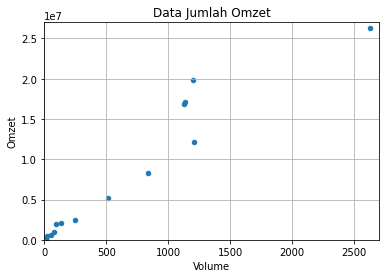

In [108]:
import matplotlib.pyplot as plt

df.plot(kind='scatter',x='volume',y='omzet_(rp)')

plt.title('Data Jumlah Omzet')
plt.xlabel('Volume')
plt.ylabel('Omzet')
plt.xlim(0, 2700)
plt.ylim(0, 27000000)
plt.grid(True)
plt.show()

In [109]:
import numpy as np
x = np.array(df['volume'])
y = np.array(df['omzet_(rp)'])

print(f'X : {x}')
print(f'Y : {y}')



X : [   1    6   11   16   24   53   82   97  134  245  514  836 1210 1126
 1137 1196 2628]
Y : [   10000    85000   110000   160000   480000   570000   990000  1940000
  2090000  2450000  5140000  8250000 12100000 16890000 17055000 19875000
 26280000]


In [110]:
x = x.reshape(-1, 1)
x.shape

(17, 1)

In [111]:
x

array([[   1],
       [   6],
       [  11],
       [  16],
       [  24],
       [  53],
       [  82],
       [  97],
       [ 134],
       [ 245],
       [ 514],
       [ 836],
       [1210],
       [1126],
       [1137],
       [1196],
       [2628]])

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [114]:
x_vis = np.array([0, 27000000]).reshape(-1,1) #Pembuatan Garis Merah
y_vis = model.predict(x_vis) #Model machine learning

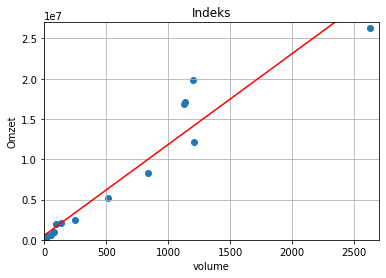

In [115]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')
plt.title('Indeks')
plt.xlabel('volume')
plt.ylabel('Omzet')
plt.xlim(0, 2700)
plt.ylim(0, 27000000)
plt.grid(True)
plt.show()

In [116]:
print(f'intercept : {model.intercept_}')
print(f"slope : {model.coef_}")

intercept : 547949.6546756979
slope : [11288.09101229]


In [117]:
#Prediksi sample data
volume = np.array([5500000, 1000000, 1400000, 2200000]).reshape(-1,1)
volume

array([[5500000],
       [1000000],
       [1400000],
       [2200000]])

In [118]:
prediksi_indeks = model.predict(volume)
prediksi_indeks

array([6.20850485e+10, 1.12886390e+10, 1.58038754e+10, 2.48343482e+10])

In [119]:
for penduduk, index in zip(volume, prediksi_indeks):
  print(f'Jumlah Penduduk : {penduduk} Prediksi Indeks : {index}')

Jumlah Penduduk : [5500000] Prediksi Indeks : 62085048517.261185
Jumlah Penduduk : [1000000] Prediksi Indeks : 11288638961.946768
Jumlah Penduduk : [1400000] Prediksi Indeks : 15803875366.863605
Jumlah Penduduk : [2200000] Prediksi Indeks : 24834348176.697277
